# Tp1 EOC

In [ ]:

import sklearn.datasets as skd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


# Loading the bank marketing dataset from OpenMl

In [ ]:
scores={}

In [ ]:

_id=1063 #37 for diabetes,841 for stock, 1472 for energy efficiency,44972 for red wine quality,1063 for kc2
X,y= fetch_openml(data_id=_id,return_X_y=True)


### Create the Extra Trees

In [ ]:

# Create the bagging classifier
ET = ExtraTreesClassifier(n_estimators=100,random_state=45)

### Create the bagged forest

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
bg = BaggingClassifier(estimator=dt, n_estimators=100, random_state=42)


### Create the Rnadom Forest Classifier

In [ ]:
RF=RandomForestClassifier(n_estimators=100,max_features=0.5,random_state=42)

### Building the baseline

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

### Hyper parameter tuning for decision tree

In [ ]:
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4, 5, 6]}

# Initialize the GridSearchCV object
grid_search_DT = RandomizedSearchCV(dt, param_grid, cv=5, scoring='accuracy',random_state=42)

# Fit the GridSearchCV object to the data
grid_search_DT.fit(X, y)

# Print the best parameters and the best score
print("Best parameters:", grid_search_DT.best_params_)
print("Best score:", grid_search_DT.best_score_)


### Hyper parameter tuning for random Forest Classifier

In [ ]:
param_dist = {'max_depth': randint(2, 30),
              'min_samples_leaf': randint(1, 20),
              'min_samples_split': randint(2, 20),
              'criterion': ['gini', 'entropy']}
random_search_RF = RandomizedSearchCV(RF, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search_RF.fit(X, y)

# Print the best parameters and the best score
print("Best parameters:", random_search_RF.best_params_)
print("Best score:", random_search_RF.best_score_)

### hyper parameter tuning for ExtraTrees

In [ ]:
param_dist = {'max_depth': randint(2, 30),
              'min_samples_leaf': randint(1, 20),
              'min_samples_split': randint(2, 20),
              'criterion': ['gini', 'entropy']}
random_search_ET = RandomizedSearchCV(ET, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search_ET.fit(X, y)

# Print the best parameters and the best score
print("Best parameters:", random_search_ET.best_params_)
print("Best score:", random_search_ET.best_score_)

### hyper parameter for Bagging

In [ ]:
param_dist = {'estimator__max_depth': randint(2, 30),
              'estimator__min_samples_leaf': randint(1, 20),
              'estimator__min_samples_split': randint(2, 20),
              'estimator__criterion': ['gini', 'entropy'],
              'bootstrap': [True, False],
              'bootstrap_features': [True, False]
             }

# Initialize the RandomizedSearchCV object
random_search_Bag = RandomizedSearchCV(bg,param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search_Bag.fit(X, y)

# Print the best parameters and the best score
print("Best parameters:",random_search_Bag.best_params_)
print("Best score:", random_search_Bag.best_score_)

In [ ]:
scores['kc2']=[grid_search_DT.best_score_,random_search_RF.best_score_,random_search_ET.best_score_,random_search_Bag.best_score_]

In [ ]:
scores

In [ ]:
import matplotlib.pyplot as plt

# data_dict is your dictionary with the dataset names as keys and the accuracy of the 4 models as values


# Get the dataset names and the accuracy values from the dictionary
datasets = list(scores.keys())
accuracies = [list(scores[dataset]) for dataset in datasets]

accuracies = list(map(list, zip(*accuracies)))
models=['Decision Tree','Random Forest','Extra Trees','Bagging Tree']
# Create the bar plot
fig, ax = plt.subplots()
bar_width = 0.15
bar_l = [i for i in range(len(accuracies[0]))]
for i in range(len(accuracies)):
    ax.bar(bar_l, accuracies[i], bar_width, label=models[i], edgecolor='black',
           align='edge')
    bar_l = [x + bar_width for x in bar_l]

# Add labels, title and names of the datasets on the x-axis
ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of 4 Models on Different Datasets')

# Place the legend outside the figure 
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# set names of the datasets on the x-axis
plt.xticks([i + bar_width for i in range(len(accuracies[0]))], datasets)

# Show the plot
plt.show()






Based on the given results, it appears that the performance of the 4 random forest techniques vary across different datasets. The performance of a technique on a specific dataset can be measured by its accuracy.

In general, the performance of the techniques is relatively high, with most of the accuracy values being above 0.5. However, there are some datasets on which the performance is relatively lower. For example, on the 'energy' dataset, the accuracy of all models is below 0.66. Similarly, on the 'wine' dataset, the accuracy of all models is below 0.6.

It is worth noting that the performance of the models on different datasets is not always consistent. For example, on the 'stock' dataset, Decision Tree has the highest accuracy, while on the 'diabetes' dataset, Decision Tree has the lowest accuracy. Similarly, on the 'energy' dataset, Bagging Tree has the highest accuracy, while on the 'kc2' dataset, Bagging Tree has the lowest accuracy.

One possible explanation for these variations in performance could be the differences in the characteristics of the datasets. Each dataset may have different features and different distributions of data points, which can affect the performance of the random forest techniques.
It's worth mentioning that Decision Tree model is having a relatively lower performance across most of the datasets compared to Random Forest, Extra Trees and Bagging Tree. While Random Forest and Extra Trees are having similar and relatively higher performance across most of the datasets.

# Experience 2 

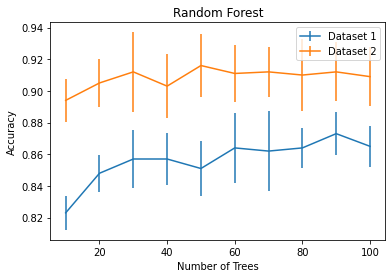

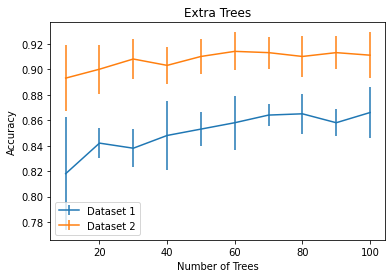

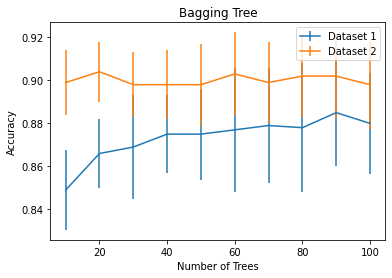

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

# Generate the datasets
X1, y1 = make_classification(n_samples=1000, n_features=20, n_classes=2, n_informative=5, n_clusters_per_class=2)
X2, y2 = make_classification(n_samples=1000, n_features=20, n_classes=2, n_informative=5, n_clusters_per_class=2)

# Define the number of trees in the forest
n_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Define the random forest techniques
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
bg = BaggingClassifier()
models = [rf, et, bg]
model_names = ['Random Forest', 'Extra Trees', 'Bagging Tree']

# Create a dictionary to store the results
results = {'Random Forest': [], 'Extra Trees': [], 'Bagging Tree': []}

# Run the experiment for each random forest technique
for i, model in enumerate(models):
    for n in n_trees:
        model.set_params(n_estimators=n)
        cv_scores1 = cross_val_score(model, X1, y1, cv=5)
        cv_scores2 = cross_val_score(model, X2, y2, cv=5)
        results[model_names[i]].append((np.mean(cv_scores1), np.mean(cv_scores2), np.std(cv_scores1), np.std(cv_scores2)))
        
# Plot the results
for model_name in model_names:
    means1 = [result[0] for result in results[model_name]]
    stds1 = [result[2] for result in results[model_name]]
    means2 = [result[1] for result in results[model_name]]
    stds2 = [result[3] for result in results[model_name]]
    plt.figure()
    plt.errorbar(n_trees, means1, stds1, label='Dataset 1')
    plt.errorbar(n_trees, means2, stds2, label='Dataset 2')
    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.title(model_name)
    plt.legend()
plt.show()



# Experience 3


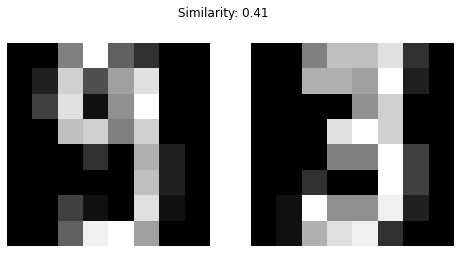

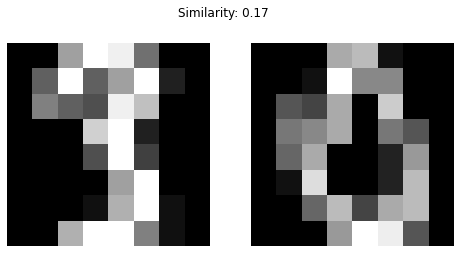

In [3]:
from sklearn.datasets import load_digits
from sklearn.metrics import pairwise_distances
import numpy as np

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

# Define the similarity measure
def similarity_measure(forest, X):
    # Get the decision paths of the instances in X
    decision_paths = forest.decision_path(X)[0].toarray().astype(int)
    # Calculate the pairwise Jaccard similarity between the decision paths
    similarities = 1 - pairwise_distances(decision_paths, metric='cosine')
    return similarities

# Calculate the similarity matrix for the instances in the digits dataset
similarities = similarity_measure(clf, X)

# Visualize a few pairs of digits to verify the consistency of the similarity measure
import matplotlib.pyplot as plt

indices = np.random.choice(len(X), size=(2, 2))
for i, index_pair in enumerate(indices):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    for j, index in enumerate(index_pair):
        ax[j].imshow(X[index].reshape(8, 8), cmap='gray')
        ax[j].axis('off')
    plt.suptitle(f'Similarity: {similarities[index_pair[0], index_pair[1]]:.2f}')
plt.show()


In [4]:
similarities

array([[1.        , 0.16273858, 0.17383247, ..., 0.18577718, 0.21834575,
        0.18700133],
       [0.16273858, 1.        , 0.35374461, ..., 0.37688135, 0.27874842,
        0.29976269],
       [0.17383247, 0.35374461, 1.        , ..., 0.34790069, 0.24241447,
        0.37194425],
       ...,
       [0.18577718, 0.37688135, 0.34790069, ..., 1.        , 0.24795734,
        0.47180108],
       [0.21834575, 0.27874842, 0.24241447, ..., 0.24795734, 1.        ,
        0.24195831],
       [0.18700133, 0.29976269, 0.37194425, ..., 0.47180108, 0.24195831,
        1.        ]])

In [5]:
indices

array([[1360,  389],
       [1566, 1077]])

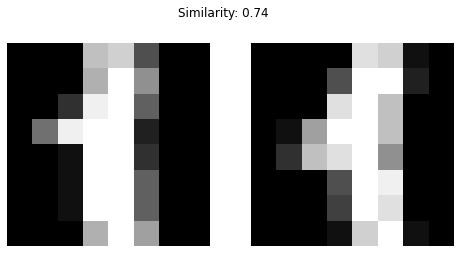

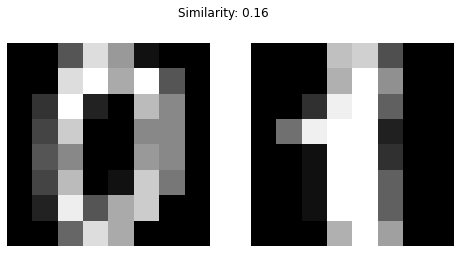

In [6]:
indices =[[1,11],[0,1]]
for i, index_pair in enumerate(indices):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    for j, index in enumerate(index_pair):
        ax[j].imshow(X[index].reshape(8, 8), cmap='gray')
        ax[j].axis('off')
    plt.suptitle(f'Similarity: {similarities[index_pair[0], index_pair[1]]:.2f}')
plt.show()